In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bps = pd.read_csv('./simdata_all_bps_comparison.csv', header=None)

In [3]:
bps.columns = ['idx','log_sp','stdev']

In [4]:
bps.head()

,idx,log_sp,stdev
0,572,2.780960,0.265163
1,610,2.659350,0.214473
2,852,1.461990,0.160761
3,887,1.138650,0.143270
4,963,0.950547,0.126712


In [7]:
bps.sort_values('idx')['idx'].tolist()

[11,
 17,
 33,
 39,
 42,
 57,
 68,
 72,
 77,
 89,
 103,
 114,
 123,
 134,
 144,
 151,
 161,
 171,
 181,
 192,
 195,
 202,
 214,
 216,
 224,
 228,
 231,
 244,
 251,
 254,
 271,
 278,
 284,
 294,
 307,
 316,
 322,
 330,
 341,
 349,
 356,
 361,
 364,
 368,
 378,
 388,
 402,
 413,
 417,
 421,
 423,
 428,
 431,
 441,
 452,
 465,
 470,
 479,
 494,
 496,
 506,
 514,
 524,
 532,
 548,
 560,
 572,
 580,
 585,
 598,
 604,
 610,
 631,
 634,
 645,
 650,
 664,
 672,
 677,
 685,
 695,
 706,
 721,
 725,
 735,
 745,
 755,
 775,
 777,
 796,
 809,
 812,
 819,
 829,
 843,
 847,
 852,
 863,
 870,
 887,
 889,
 891,
 901,
 903,
 909,
 915,
 926,
 932,
 941,
 958,
 963,
 968,
 971,
 981,
 985]

In [6]:
bps.shape

(115, 3)

In [7]:
bps.index = bps['idx']

In [8]:
n_bins = 1000
all_bins = range(0,n_bins)

In [9]:
all_bins_df = pd.DataFrame(index=all_bins)
all_bins_df['idx'] = all_bins_df.index
all_bins_df['log_sp'] = None
all_bins_df['stdev'] = None

In [10]:
all_bins_df.head()

,idx,log_sp,stdev
0,0,None,None
1,1,None,None
2,2,None,None
3,3,None,None
4,4,None,None


In [11]:
ground_truth = pd.read_csv('./10nodes_40regions_10000reads_sim_tiny2_effective_regions.txt',header=None)
ground_truth = ground_truth[0].values.tolist()
ground_truth

[277, 415, 548, 572, 635, 650, 795, 852, 963]

In [12]:
Counter((0.1*bps['log_sp'] - bps['stdev']).values > 0)

Counter({False: 113, True: 2})

In [13]:
Counter((9.1*bps['log_sp'] - bps['stdev']).values > 0)

Counter({True: 115})

### ROC curve
Each breakpoint candidate has a different stdev value. The ROC computations should take that into account.

In [14]:
bps['ranking'] = bps['log_sp'] / bps['stdev']

In [16]:
bps = bps.dropna()

In [24]:
threshold_coeffs = sorted(bps['ranking'].values)

In [25]:
threshold_coeffs

[1.1590777576141684,
 1.1656815464844719,
 1.2099689365668915,
 1.249719638620659,
 1.2506435780265985,
 1.2788481809085215,
 1.3108399632574048,
 1.3171861395440687,
 1.3216550019060873,
 1.3278003429912444,
 1.3324882396266289,
 1.33282504339587,
 1.3384100641407617,
 1.3428582918075527,
 1.3584228420134186,
 1.3705039067673153,
 1.4047102430592537,
 1.4568978372078158,
 1.4898038058082246,
 1.4960179913147473,
 1.530080370538309,
 1.5851111884312759,
 1.6046059119865657,
 1.6104018030344758,
 1.6114529371586617,
 1.616243667186282,
 1.624430998688002,
 1.6472066070251203,
 1.65103160232094,
 1.6524367824271748,
 1.6617548148706314,
 1.6620038447829568,
 1.6697599832560772,
 1.684512327612966,
 1.7009196009961185,
 1.7292258013319415,
 1.7407737347837007,
 1.7731420250782106,
 1.7891879345665183,
 1.7903870008418192,
 1.814767119082369,
 1.816792852141394,
 1.8735039050613653,
 1.936995456378407,
 1.949408593135295,
 1.9601501566050485,
 1.9840607760539037,
 1.9844342645676283,
 1.99

In [26]:
tpr_values = []
fpr_values = []
for thr in threshold_coeffs:
    positives = []
    negatives = []
    # import ipdb; ipdb.set_trace() # debugging starts here
    for index, row in bps.iterrows():
        if row['ranking'] > thr:
            positives.append(row['idx'])
        else:
            break 
    negatives = [i for i in bps['idx'].values.tolist() if i not in positives]
    
    print(len(negatives))
    
    # positives = bps[(thr > bps['ranking'])]['idx'].values.tolist()
    # negatives = bps[(thr <= bps['ranking'])]['idx'].values.tolist()

    true_positives = [i for i in positives if i in ground_truth]
    false_positives = [i for i in positives if i not in true_positives]

    true_negatives = [i for i in negatives if i not in ground_truth]
    false_negatives = [i for i in negatives if i in ground_truth]

    tpr = len(true_positives) / (len(true_positives) + len(false_negatives))
    fpr = len(false_positives) / (len(false_positives) + len(true_negatives))
    tpr_values.append(tpr)
    fpr_values.append(fpr)

1
2
10
10
11
12
13
14
14
15
15
15
15
15
16
16
17
18
19
20
21
22
28
29
33
33
33
33
37
37
37
37
37
37
37
37
38
38
43
43
43
43
45
46
48
49
50
54
54
54
55
56
56
57
57
57
58
59
59
88
88
88
88
88
88
88
88
88
88
88
88
89
89
90
90
90
91
91
94
94
94
94
94
94
94
94
97
97
97
97
98
98
98
98
98
99
99
99
100
101
101
102
103
104
105
106
108
111
112
112
112
112
113
115
115


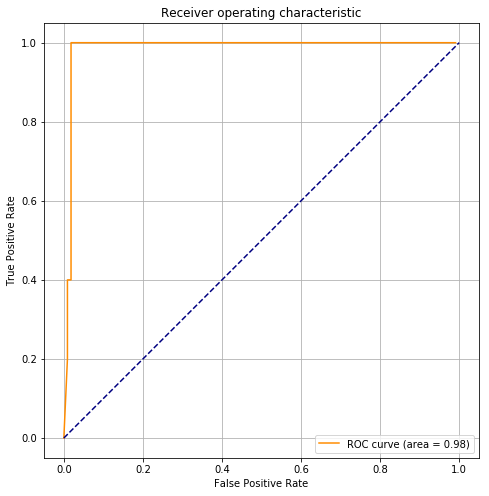

In [27]:
roc_auc = auc(fpr_values, tpr_values)
plt.figure(figsize=(8,8))
plt.plot(fpr_values, tpr_values, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()